# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os

import os
import tarfile
import urllib

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

#allows output to be stable across the seed
np.random.seed(42) 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from rdkit import rdBase
from rdkit import RDConfig
rdBase.rdkitVersion

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image

%matplotlib inline

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.DataStructs import ConvertToNumpyArray

from rdkit.Chem import PandasTools

import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
    
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.AllChem import GetMorganFingerprint, GetMorganFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np

from rdkit.Chem import PandasTools
from rdkit import DataStructs

# Retrieve LogP Values of Compounds 
* Lipophilicity is a valuable parameter of the drug which affects its activity in the human body. The Log P value of the compound indicates the permeability of the drugs to reach the target tissue in the body. Investigated compounds are lipophilic when Log P > 0 (or P > 1).

In [2]:
import os 
datapath = os.path.join("")
logp = pd.read_csv(datapath + "logP.csv", thousands=',')
logp.head(5)

,Unnamed: 0,SMILES,Kow
0,1,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885
1,2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190
2,3,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100
3,4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470
4,5,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400


In [3]:
logp.describe()

,Unnamed: 0,Kow
count,14176.000000,14176.000000
mean,7101.573857,2.067719
std,4095.549892,1.828840
min,1.000000,-5.400000
25%,3556.750000,0.880000
50%,7100.500000,1.990000
75%,10645.250000,3.150000
max,14207.000000,11.290000


In [4]:
logp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14176 entries, 0 to 14175
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14176 non-null  int64  
 1   SMILES      14176 non-null  object 
 2   Kow         14176 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 332.4+ KB


In [5]:
logp['SMILES'].nunique()

14152

In [6]:
logp = logp.drop_duplicates(['SMILES'])
logp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14152 entries, 0 to 14175
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14152 non-null  int64  
 1   SMILES      14152 non-null  object 
 2   Kow         14152 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 442.2+ KB


# Generate Molecules

,Unnamed: 0,SMILES,Kow,Molecule
0,1,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885,
1,2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190,
2,3,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100,
3,4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470,
4,5,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400,

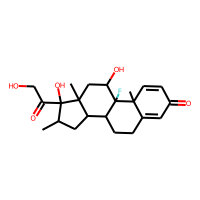
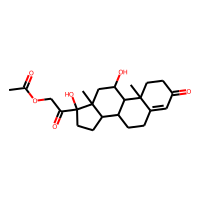
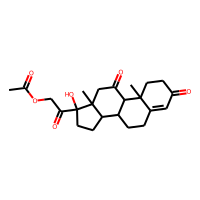
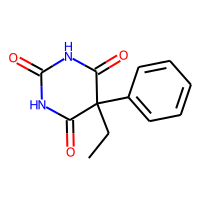
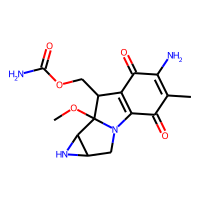

In [7]:
# Create Mol rdkit objects for each smile
PandasTools.AddMoleculeColumnToFrame(frame=logp, smilesCol='SMILES', molCol='Molecule')

logp.head()

In [8]:
logp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14152 entries, 0 to 14175
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14152 non-null  int64  
 1   SMILES      14152 non-null  object 
 2   Kow         14152 non-null  float64
 3   Molecule    14152 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 552.8+ KB


# Generate Descriptors

In [9]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
descriptors = list(np.array(Descriptors._descList)[:,0])
print(np.array(Descriptors._descList)[:,0])

['MaxEStateIndex' 'MinEStateIndex' 'MaxAbsEStateIndex' 'MinAbsEStateIndex'
 'qed' 'MolWt' 'HeavyAtomMolWt' 'ExactMolWt' 'NumValenceElectrons'
 'NumRadicalElectrons' 'MaxPartialCharge' 'MinPartialCharge'
 'MaxAbsPartialCharge' 'MinAbsPartialCharge' 'FpDensityMorgan1'
 'FpDensityMorgan2' 'FpDensityMorgan3' 'BCUT2D_MWHI' 'BCUT2D_MWLOW'
 'BCUT2D_CHGHI' 'BCUT2D_CHGLO' 'BCUT2D_LOGPHI' 'BCUT2D_LOGPLOW'
 'BCUT2D_MRHI' 'BCUT2D_MRLOW' 'BalabanJ' 'BertzCT' 'Chi0' 'Chi0n' 'Chi0v'
 'Chi1' 'Chi1n' 'Chi1v' 'Chi2n' 'Chi2v' 'Chi3n' 'Chi3v' 'Chi4n' 'Chi4v'
 'HallKierAlpha' 'Ipc' 'Kappa1' 'Kappa2' 'Kappa3' 'LabuteASA' 'PEOE_VSA1'
 'PEOE_VSA10' 'PEOE_VSA11' 'PEOE_VSA12' 'PEOE_VSA13' 'PEOE_VSA14'
 'PEOE_VSA2' 'PEOE_VSA3' 'PEOE_VSA4' 'PEOE_VSA5' 'PEOE_VSA6' 'PEOE_VSA7'
 'PEOE_VSA8' 'PEOE_VSA9' 'SMR_VSA1' 'SMR_VSA10' 'SMR_VSA2' 'SMR_VSA3'
 'SMR_VSA4' 'SMR_VSA5' 'SMR_VSA6' 'SMR_VSA7' 'SMR_VSA8' 'SMR_VSA9'
 'SlogP_VSA1' 'SlogP_VSA10' 'SlogP_VSA11' 'SlogP_VSA12' 'SlogP_VSA2'
 'SlogP_VSA3' 'SlogP_VSA4' 'SlogP_VS

In [10]:
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors)
# Define a custom function to calculate molecular descriptors
def computeDescriptors(mol, calculator):
    res = list(calculator.CalcDescriptors(mol))
    if not np.all(np.isfinite(res)):
        return None  
# Make it's easier to identify problematic molecules (e.g.: infinty descriptor values) later 
    return res

# Compute the descriptors
logp['Descriptors'] = logp['Molecule'].map(lambda x: computeDescriptors(x,calculator))
# Remove rows with non-finite descriptor values (seems to be only 1 by comparing the counts)
logp = logp[logp['Descriptors'].map(lambda x: x is not None)]

df_descriptors = pd.DataFrame(descriptors, columns=['desc_name'])
df_descriptors

,desc_name
0,MaxEStateIndex
1,MinEStateIndex
2,MaxAbsEStateIndex
3,MinAbsEStateIndex
4,qed
...,...
203,fr_thiazole
204,fr_thiocyan
205,fr_thiophene
206,fr_unbrch_alkane


In [11]:
desc_name = [df_descriptors['desc_name'][i] for i in range(len(df_descriptors))]
desc_val = [list(l) for l in logp['Descriptors']]
df_desc = pd.DataFrame(desc_val, index = logp.index, columns=desc_name)

df_desc.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,16.859063,-1.980464,16.859063,0.067556,0.667213,392.467,363.235,392.199902,154,0,...,0,0,0,0,0,0,0,0,0,0
1,12.870043,-1.584704,12.870043,0.041293,0.700523,404.503,372.247,404.219889,160,0,...,0,0,0,0,0,0,0,0,0,0
2,13.474536,-1.645537,13.474536,0.062483,0.728839,402.487,372.247,402.204239,158,0,...,0,0,0,0,0,0,0,0,0,0
3,11.975791,-1.310347,11.975791,0.293611,0.736884,232.239,220.143,232.084792,88,0,...,0,0,0,0,0,0,0,0,0,1
4,12.770676,-0.957338,12.770676,0.058604,0.410670,334.332,316.188,334.127720,128,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
logp = pd.concat([logp, df_desc], axis= 1, ignore_index=False)

In [13]:
logp.shape

(14139, 213)

In [14]:
#Finds Null data in any row if any
sample_incomplete_rows = logp[logp.isnull().any(axis=1)]
sample_incomplete_rows.head(len(sample_incomplete_rows))

,Unnamed: 0,SMILES,Kow,Molecule,Descriptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea


In [15]:
#Returns number of unique values in the specifed column to make sure that no duplications there
logp['SMILES'].nunique()

14139

In [16]:
#Returns number of total rows
logp['SMILES'].count()

14139

In [17]:
logp.describe()

,Unnamed: 0,Kow,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,...,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000
mean,7108.040455,2.072912,10.013862,-0.699051,10.013862,0.288489,0.602197,253.448640,238.752971,253.067789,...,0.051489,0.049013,0.018247,0.008416,0.005800,0.012377,0.000566,0.016055,0.252564,0.052196
std,4095.683232,1.825006,2.988521,1.369446,2.988521,0.341518,0.170423,108.698612,102.524970,108.526426,...,0.239730,0.231400,0.134902,0.105714,0.075936,0.110566,0.023781,0.130658,1.091289,0.234806
min,1.000000,-5.080000,1.500000,-9.751681,1.500000,0.000000,0.023462,40.065000,36.033000,40.031300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3562.500000,0.890000,9.016190,-0.981904,9.016190,0.069607,0.488372,178.235000,168.107000,178.110613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7110.000000,1.990000,10.998636,-0.440579,10.998636,0.174630,0.609702,237.690000,224.174000,237.172879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10653.500000,3.150000,11.989385,0.094932,11.989385,0.373769,0.734137,307.991000,291.198000,306.990551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14207.000000,11.290000,17.532414,2.250000,17.532414,7.352500,0.943451,1202.635000,1090.747000,1201.841368,...,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,26.000000,2.000000


,Unnamed: 0,SMILES,Kow,Molecule,Descriptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885,,"[16.85906328735198, -1.980464025888133, 16.859...",16.859063,-1.980464,16.859063,0.067556,0.667213,...,0,0,0,0,0,0,0,0,0,0
1,2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190,,"[12.870042992779961, -1.5847037456958093, 12.8...",12.870043,-1.584704,12.870043,0.041293,0.700523,...,0,0,0,0,0,0,0,0,0,0
2,3,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100,,"[13.474536223439994, -1.6455370790291424, 13.4...",13.474536,-1.645537,13.474536,0.062483,0.728839,...,0,0,0,0,0,0,0,0,0,0
3,4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470,,"[11.97579081632653, -1.310347222222222, 11.975...",11.975791,-1.310347,11.975791,0.293611,0.736884,...,0,0,0,0,0,0,0,0,0,1
4,5,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400,,"[12.77067649281935, -0.957337962962963, 12.770...",12.770676,-0.957338,12.770676,0.058604,0.410670,...,0,0,0,0,0,0,0,0,0,0

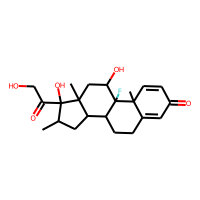
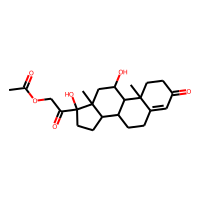
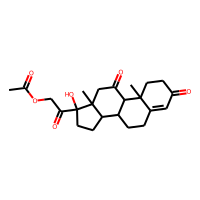
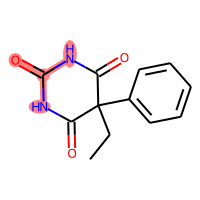
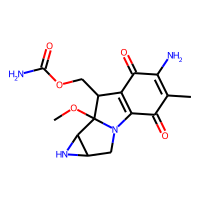

In [18]:
logp.head()

# Xgboost with Default Parameters Using Descriptors

## Split and Preprocess the Data 

In [19]:
X = logp.drop(["SMILES","Kow", "Molecule", "Descriptors"], axis = 1).values
y = logp["Kow"].values

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for remaining_index, valid_index in split.split(X, y):
    X_remaining, X_valid = X[remaining_index], X[valid_index]
    y_remaining, y_valid = y[remaining_index], y[valid_index]    
    
    
# X_remaining, X_valid, y_remaining, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

In [32]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
print(type(X_valid))
print(type(y_valid))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Xgboost Regressor

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
model = xgb.fit(X_train, y_train)

[11:27:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

## RMSE Values 

### Training Dataset 

In [36]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
xgb_mse = mean_squared_error(y_train, y_train_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.5902832605240762

### Validation Dataset 

In [37]:
y_valid_pred = model.predict(X_valid)
xgb_mse = mean_squared_error(y_valid, y_valid_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

1.7277177974100546

### Test Dataset

In [38]:
y_test_pred = model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.6154525622600906

# Xgboost Regressor with Grid Search Using Descriptors

In [ ]:
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
          'min_child_weight': range(1, 10),
          'subsample': np.arange(0.1, 1.0, 0.1),
          'colsample_bytree': np.arange(0.1, 1.0, 0.1),
          'max_depth': range(3, 10),
          'n_estimators': range(200, 5000, 200)
        }

In [ ]:
from sklearn.model_selection import ParameterGrid
grid = ParameterGrid(param_grid)
len(grid)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

best_model = None
best_rmse=np.inf
best_param = {}
for this_param in tqdm(grid):
    this_model = XGBRegressor(**this_param, random_state=42)
    this_model.fit(X_train, y_train)
    xgb_mse = mean_squared_error(y_valid, this_model.predict(X_valid))
    xgb_rmse = np.sqrt(xgb_mse)
    if best_rmse > xgb_rmse:
        best_model = this_model
        best_rmse = xgb_rmse
        best_param = this_param

In [ ]:
print(best_param)

## RMSE Values 

### Training Dataset 

In [ ]:
y_train_pred = best_model.predict(X_train)

xgb_mse = mean_squared_error(y_train, y_train_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

### Validation Dataset 

In [ ]:
y_valid_pred =best_model.predict(X_valid)

xgb_mse = mean_squared_error(y_valid, y_valid_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

### Test Dataset

In [ ]:
y_test_pred = model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

# Summary of Results 

In [ ]:
|<div align="center">Model name</div>||<div align="center">Training RMSE</div>||<div align="center">Validation RMSE</div>||<div align="center">Test RMSE</div>|
|---||---||---||---|
|<div align="center">Random Forest Model with Default Parameters Using Descriptors</div>||<div align="center">0.242</div>||<div align="center">0.638</div>||<div align="center">0.610</div>|
|<div align="center">Random Forest Model with GridSearch Using Descriptors)</div>||<div align="center">0.298</div>||<div align="center">0.648</div>||<div align="center">0.577</div>|
|<div align="center">Xgboost Model with Default Parameters Using Morgan Fingerprints</div>||<div align="center">0.242</div>||<div align="center">0.638</div>||<div align="center">0.610</div>|
|<div align="center">Xgboost Model with GridSearch Using Descriptors)</div>||<div align="center">0.298</div>||<div align="center">0.648</div>||<div align="center">0.577</div>|
<br>